In [1]:
# Authors: M.Badzohreh - A.M.Kharazi
# License: BSD 3 clause

# Add to the path

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# Extract Informations

In [3]:
def extract_values(line):
    pattern = re.compile(r'(\w+)\s(\w+)\s(\d+):\s([\w\d\.\=,%\s]+)')
    match = pattern.match(line)
    if match:
        values = match.group(4)
        values_dict = dict(item.split('=') for item in values.split(', '))
        return int(match.group(3)), values_dict
    return None, None

def read_report(file_path, metric, train=True):
    epochs = []
    values_list = []
    epoch_type = "Train" if train else "Test"

    with open(file_path, 'r') as file:
        for line in file:
            if f"{epoch_type} epoch" in line:
                epoch, values = extract_values(line)
                if epoch is not None:
                    epochs.append(epoch)
                    values_list.append(float(values[metric].replace('%', '')))
    
    return pd.DataFrame({'Epoch': epochs, metric: values_list})

# Plot Functions

In [4]:
def plot_metric(ax, file_paths, labels, metric, train, title, xlabel, ylabel, x_grid, loc = 'best'):
    for file_path, label in zip(file_paths, labels):
        data = read_report(file_path, metric, train)
        ax.plot(data['epoch'].to_numpy(), data[metric].to_numpy(), linestyle='-', label=label)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc = loc)
    ax.grid(False)
    if not x_grid:
        ax.xaxis.set_visible(False) 

# Plots

In [11]:
file_paths1 = [
    '../results/Test_ID01/accuracy_stats/report_train.txt',
    '../results/Test_ID01/accuracy_stats/report_train.txt',
    '../results/Test_ID01/accuracy_stats/report_train.txt',
    '../results/Test_ID01/accuracy_stats/report_train.txt',
    # '../results/Test_ID004/accuracy_stats/report_train.txt',
]
# file_paths2 = [
#     '../results/Test_ID049/accuracy_stats/report.txt',
#     '../results/Test_ID052/accuracy_stats/report.txt',
#     '../results/Test_ID058/accuracy_stats/report.txt',
#     '../results/Test_ID059/accuracy_stats/report.txt'
# ]
# file_paths3 = [
#     '../results/Test_ID085/accuracy_stats/report.txt',
#     '../results/Test_ID086/accuracy_stats/report.txt',
#     '../results/Test_ID087/accuracy_stats/report.txt',
#     '../results/Test_ID090/accuracy_stats/report.txt'
# ]
labels1 = ['base', 'trl (50,3,3,3)', 'attached (2,2,2) -> trl (1,1,1,20,1,1,4)', 'compressed (16,2,2) -> trl (4,1,1,20,1,1,10)'] 
labels2 = ['base', 'trl (50,3,3,3)', 'compressed (16,2,2) --> trl (4,1,1,20,1,1,10)', 'attached (16,2,2) --> trl (4,1,1,10,1,1,4)'] 
labels3 = ['base', 'tcl (512,6,6) --> trl (512,6,6,200)', 'attached (2,2,2) --> tcl (2,2,2,256,1,1) --> trl (1,1,1,256,1,1,200)', 'compressed (8,2,2) --> tcl (6,2,2,64,3,3) --> trl (4,2,2,64,1,1,200)'] 


title1 = 'ResNet50 -  MNIST'
title2 = 'ResNet101 -  CIFAR10'
title3 = 'VGG19 -  Tiny ImageNet'
 

metric = ['top1', 'top1', 'top5', 'loss', 'loss', 'loss'] 
train = False 
xlabel = 'Epoch'
ylabel =  ['TOP1 (%)', 'TOP1 (%)', 'TOP5 (%)', 'LOSS', 'LOSS', 'LOSS']

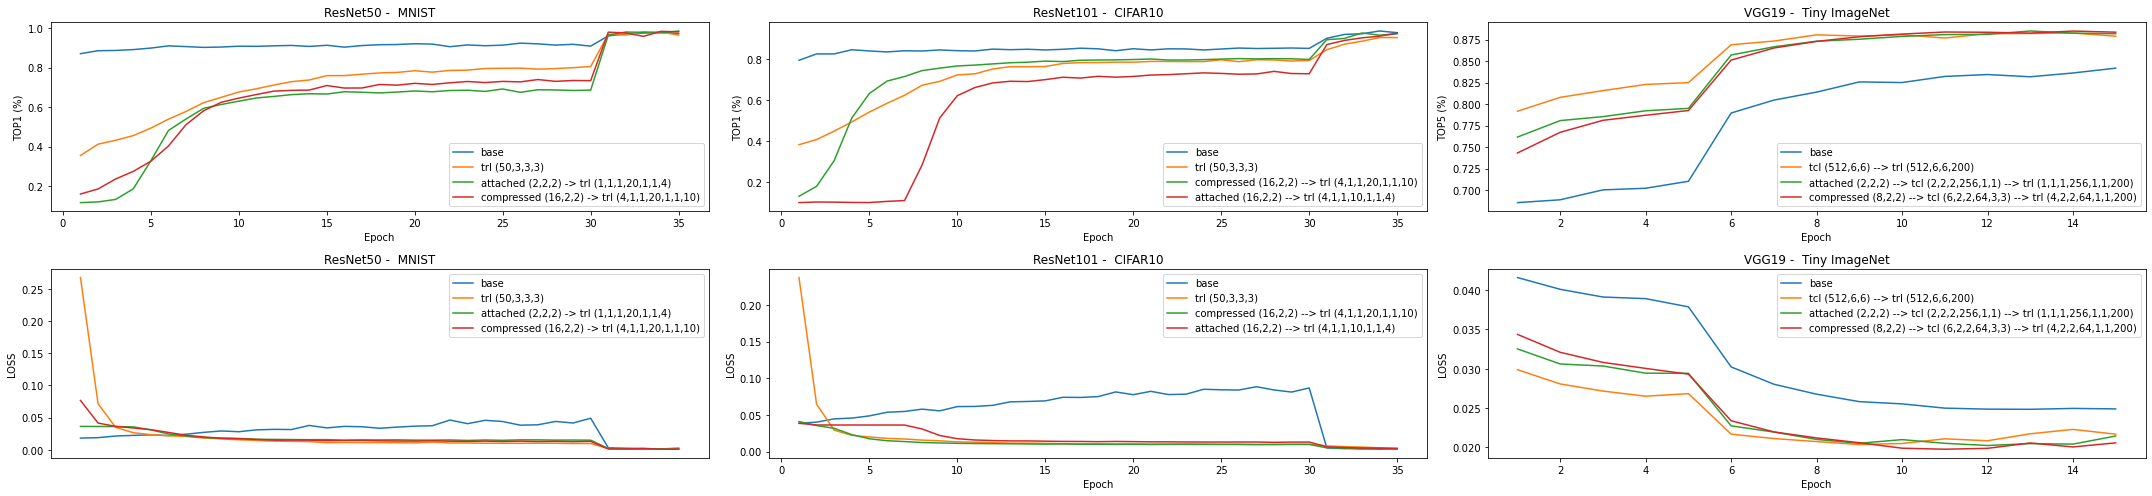

In [7]:



fig, axes = plt.subplots(2, 3, figsize=(30, 7))
 
plot_metric(axes[0,0], file_paths1, labels1, metric[0], train, title1, xlabel, ylabel[0], True, loc = 'lower right')


plt.tight_layout()  
plt.show()

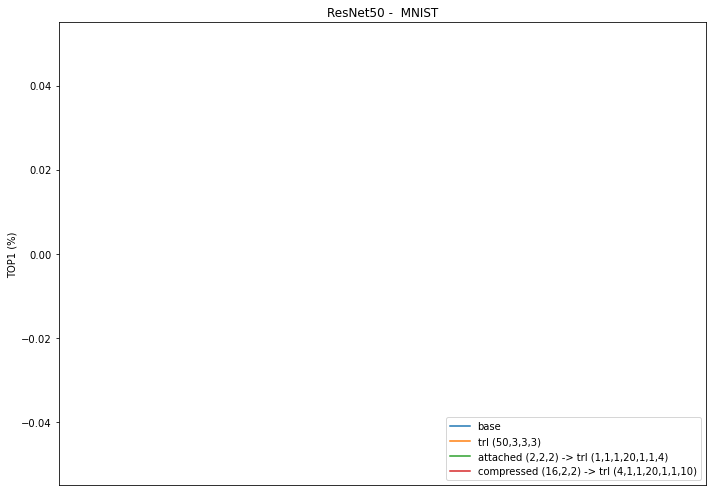

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

plot_metric(axes, file_paths1, labels1, metric[0], train, title1, xlabel, ylabel[0], False, loc = 'lower right')

plt.tight_layout()  
plt.show()

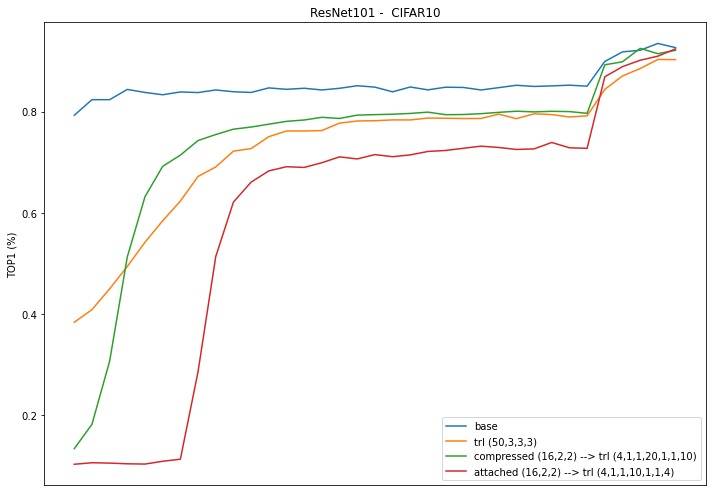

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

plot_metric(axes, file_paths2, labels2, metric[1], train, title2, xlabel, ylabel[1], False, loc = 'lower right')

plt.tight_layout()  
plt.show()

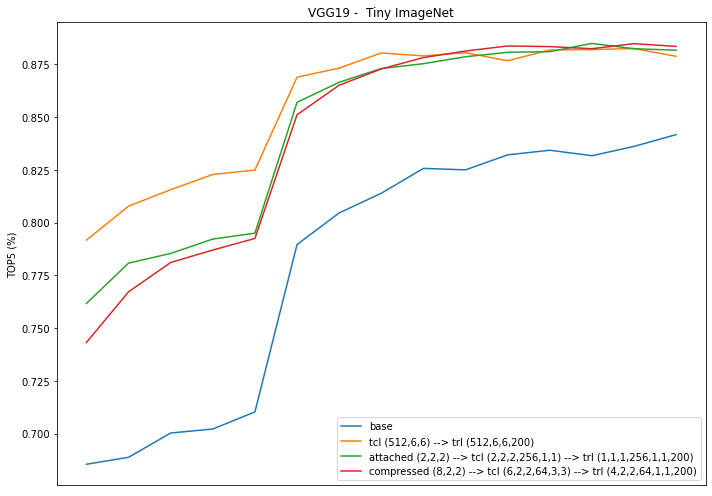

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

plot_metric(axes, file_paths3, labels3, metric[2], train, title3, xlabel, ylabel[2], False, loc = 'lower right')

plt.tight_layout()  
plt.show()

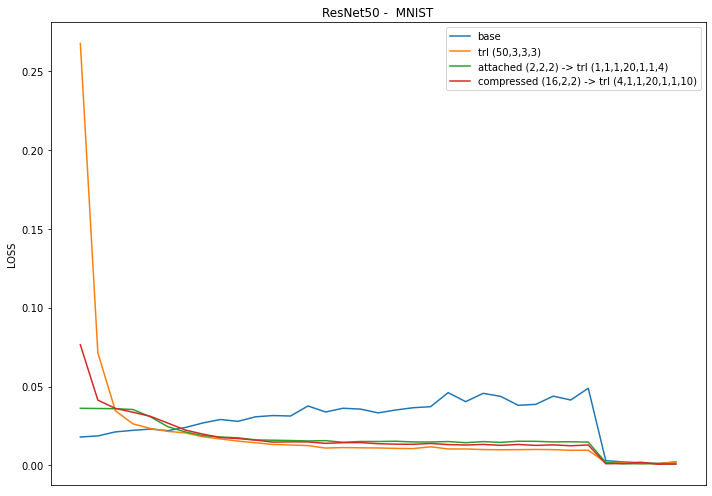

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

plot_metric(axes, file_paths1, labels1, metric[3], train, title1, xlabel, ylabel[3], False, loc = 'upper right')

plt.tight_layout()  
plt.show()

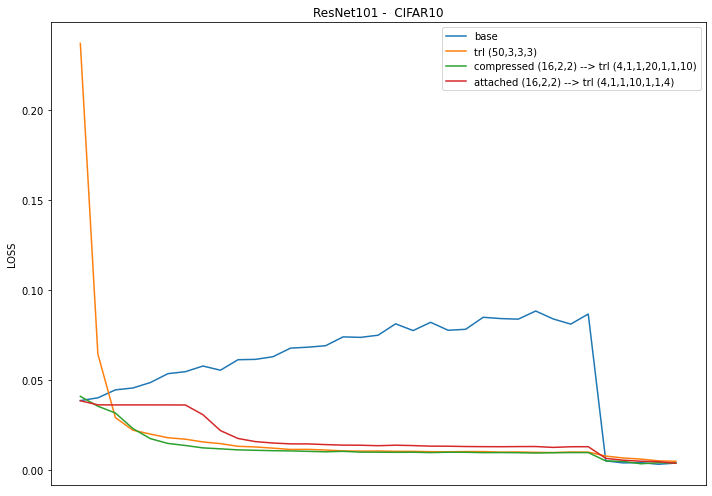

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

plot_metric(axes, file_paths2, labels2, metric[4], train, title2, xlabel, ylabel[4], False, loc = 'upper right')

plt.tight_layout()  
plt.show()

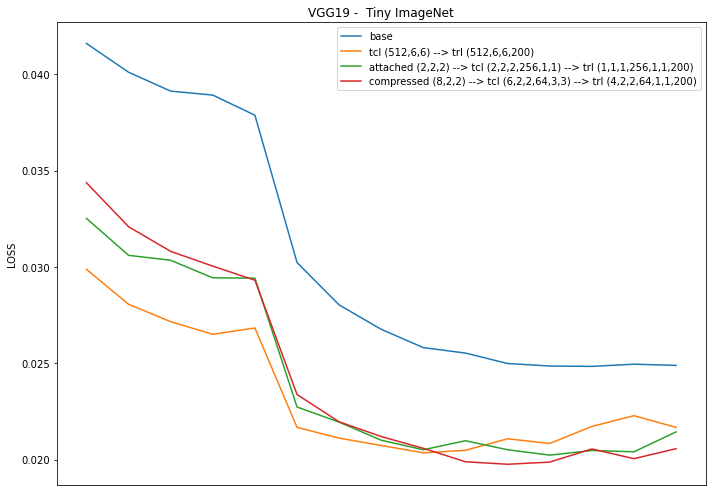

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))

plot_metric(axes, file_paths3, labels3, metric[5], train, title3, xlabel, ylabel[5], False, loc = 'upper right')

plt.tight_layout()  
plt.show()